In [28]:
from catboost import CatBoostClassifier
import pandas as pd
import numpy as np
pd.options.mode.chained_assignment = None  # default='warn'
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score


In [ ]:
# grab a pre-split curated dataset that is 50% of original data
y = pd.read_csv('.test50.csv', sep=',',low_memory=False)
x = y[['PCHANGE', 'GENE', 'Domain', 'ClinicalSignificance','EFFECT', 'Civic_Evidence', 'CATEGORIZATION', 'FAF', 'GNOMAD_AC', 'GNOMAD_AF', 'EXON_Rank', 'COSMIC_CNT','MVP_score', 'Civic_Drug', 'PMID_COUNT', 'KEGG']]


In [30]:
s = x.drop('CATEGORIZATION', axis=1)
s.fillna(-999, inplace=True)

In [35]:
compM = CatBoostClassifier()
compM.load_model('azurify.json', format='json')

In [ ]:
#this specific block is to generate emergent path data for upset plot
#print(predl)
preds = compM.predict(data=s)
s['Azurify'] = preds
s['Reported'] = x['CATEGORIZATION']
s.head()

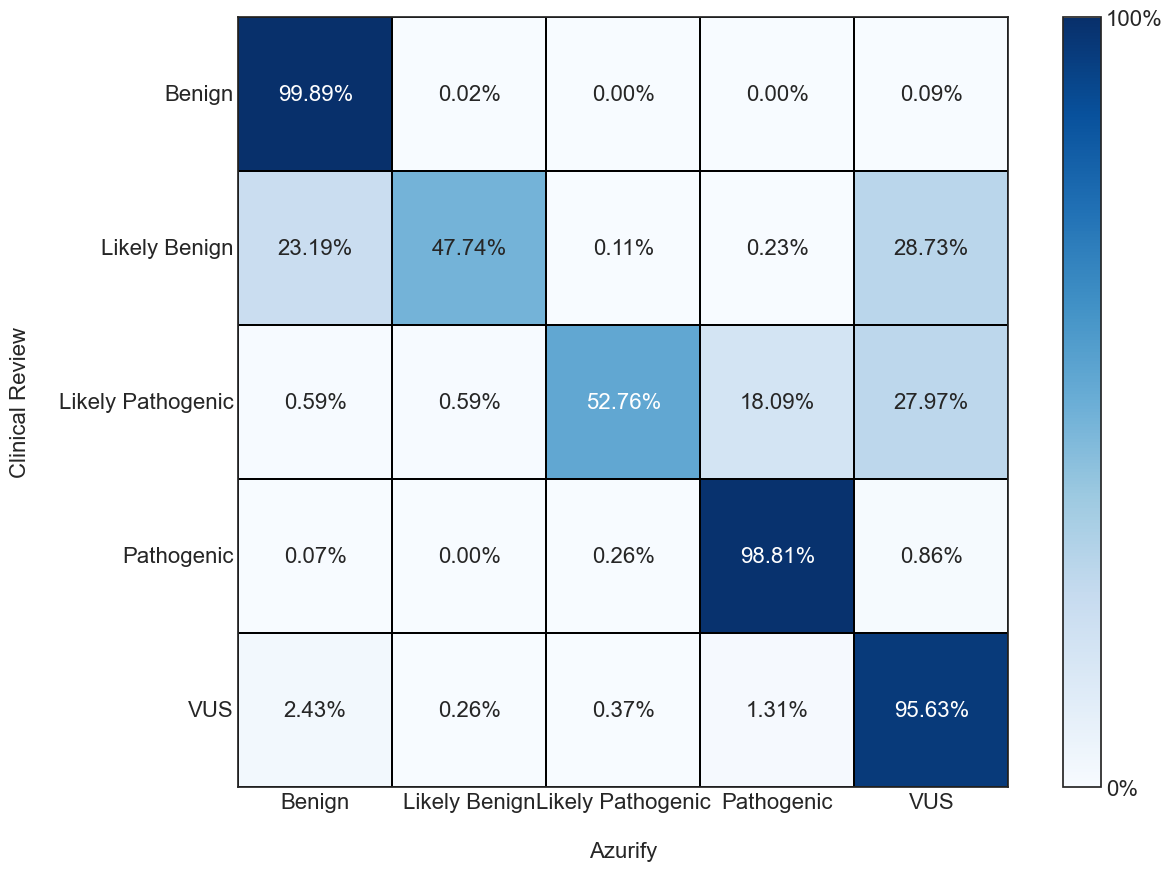

In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.ticker import FuncFormatter
plt.rcParams['font.size'] = 12
plt.style.use('seaborn-white')

# figure size in inches
rcParams['figure.figsize'] = 14,10
plt.rcParams['font.size'] = 16
plt.rcParams["font.family"] = "Arial"
df = pd.DataFrame(s, columns=['Reported','Azurify'])
df.replace(['Disease Associated', 'Probably DA', 'VOUS'], ['Pathogenic', 'Likely Pathogenic', 'VUS'], inplace=True)
df.sort_values(by=['Reported'])
fmt = lambda x,pos: '{:.0%}'.format(x)
confusion_matrix = pd.crosstab(df['Reported'], df['Azurify'], rownames=['Clinical Review\n'], colnames=['\nAzurify']).apply(lambda r: r/r.sum(), axis=1)
res=sns.heatmap(confusion_matrix,annot=True, 
          fmt=".2%", cmap="Blues", cbar=False,square=True,  linewidths=0.1, linecolor='black')
for _, spine in res.spines.items():
    spine.set_visible(True)
cbar = res.figure.colorbar(res.collections[0])
cbar.set_ticks([0, 1])
cbar.set_ticklabels(["0%", "100%"])
plt.yticks(rotation=0)
plt.savefig('Holdout_heatmap.pdf',bbox_inches='tight',dpi=600)
plt.show()